In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# converts rgb image to grayscale
def grayscale_image(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [11]:
# prints image dimensions and plot the image
def show_image(img, cmap='viridis'):
    print(" Image Dimensions : {}".format(img.shape))
    plt.figure(figsize=(12,8))
    plt.imshow(img, cmap=cmap)

In [5]:
# returns canny image with appropiate threshold levels
def canny_image(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

In [6]:
# returns blurred image (gaussian blur)
def blur_image(img, kernelsize):
    return cv2.GaussianBlur(img, (kernelsize, kernelsize), 0)

In [7]:
# return HSV - hue, saturation, valued image
def hsv_image(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [15]:
# return filtered image
def filter_image(img):
    # GET WHITE MASK
    processed_img = grayscale_image(img)
    # we get white mask
    white_mask = cv2.inRange(processed_img, 200, 255)
    
    # now lets convert image to hsv model to get low and high yellow values
    
    processed_img = hsv_image(img)
    
    # https://i.stack.imgur.com/TSKh8.png <- to get hsv values
    # lower hsv for yellow 
    lower = np.array([15,100,100], dtype='uint8')
    # higher hsv for yellow
    higher = np.array([75, 255, 255], dtype='uint8')
    
    # yellow mask obtained :D
    yellow_mask = cv2.inRange(processed_img, lower, higher)
    
    
    # bitwise 'OR' to get best of both world
    masked = cv2.bitwise_or(white_mask, yellow_mask)
    
    # final masked using bitwise 'AND' with image
    final_masked = cv2.bitwise_and(processed_img, processed_img, masked)
    
    return final_masked

In [18]:
# return cropped image
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    # fill the mask
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    # now show area that is the mask
    masked = cv2.bitwise_and(img, mask)
    return masked

In [ ]:
# slope matters too 
def get_slope(x1,y1,x2,y2):
    # this is very useful in drawing lines
    return (y2-y1)/(x2-x1)

In [ ]:
# draws line on image
def draw_lines(img, lines, color=[0,255,255], thickness=4):
    # 'lines' is o/p from hough lines
    # thickness of 4 would suffice ;-p
    
    '''
    
    '''
    
    

In [ ]:
# hough lines
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    # here 'img' should be canny image
    # return hough lines drawn
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), 
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    # line_img
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    # draw line funcn:
    draw_lines(line_img,lines)
    return line_img

In [19]:
def process_img(img):
    # resize our image to 800x640 for future purpose ;)
    dim = (800,640)
    img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
    # lets convert our image to RGB instead of BGR
    processed_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # save og image for future
    og_img = processed_img
    
    # get filtered image
    processed_img = filter_image(processed_img)
    
    # apply guassian blur
    kernelsize=5
    processed_img = blur_image(processed_img, kernelsize)
    
    # apply Canny effect
    low_thresh = 50
    high_thresh = 150
    
    processed_img = canny_image(processed_img, low_thresh, high_thresh)
    
    # region of interest on image
    lower_left = [50,600]
    lower_right = [750,600]
    top_left = [100,400]
    top_right = [700,400]
    
    # dont forget that vertices is array of array took me 2hrs to solve this problem
    vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
    processed_img = region_of_interest(processed_img, vertices)
    
    # show processed image
    return processed_img

 Image Dimensions : (640, 800)


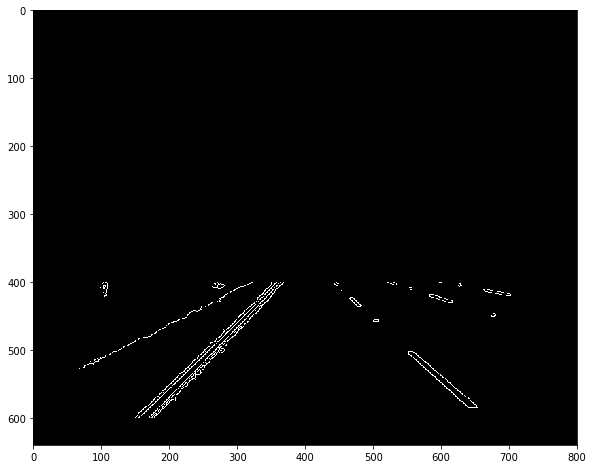

In [20]:
img = cv2.imread('images/solidYellowLeft.jpg')
processed_img = process_img(img)
show_image(processed_img, cmap='gray')